# *CNN for image classification on CIFAR10*

Step 1. Create your custom dataset featuring 3 custom categories of at least 100 images each

Step 2. Split this data between 80% training and 20% test

Step 3. Preprocess the data as you see fit

In [1]:
import os

# Define the main data directory
data_dir = r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10"
# Count images and print size
total_images = 0
for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust for your image formats
            total_images += 1
            image_path = os.path.join(root, file)

print("Total images in the dataset:", total_images)


Total images in the dataset: 3600


In [3]:
import os
from collections import defaultdict

# Define the path to the folder containing subfolders for each class
folder_path = r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10"

# Initialize variables to store counts
total_images = 0
class_counts = defaultdict(int)

# Iterate over subfolders
for class_folder in os.listdir(folder_path):
    class_folder_path = os.path.join(folder_path, class_folder)
    if os.path.isdir(class_folder_path):
        # Count the number of images in each subfolder
        num_images = len(os.listdir(class_folder_path))
        total_images += num_images
        class_counts[class_folder] = num_images

# Print total number of images
print("Total number of images:", total_images)

# Print total number of classes
print("Total number of classes:", len(class_counts))

# Print number of images in each class
print("Number of images in each class:")
for class_name, num_images in class_counts.items():
    print(f"{class_name}: {num_images}")


Total number of images: 3600
Total number of classes: 6
Number of images in each class:
apple: 600
baby: 600
bus: 600
butterfly: 600
dinosaur: 600
dolphin: 600


Class: apple
Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\apple\golden_delicious_s_000273.png


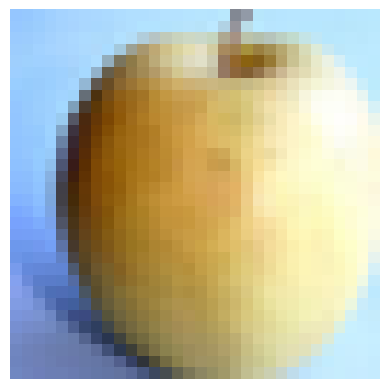

Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\apple\northern_spy_s_000273.png


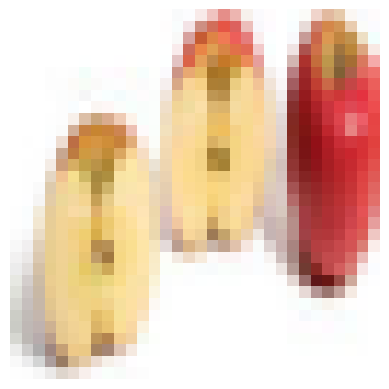


Class: baby
Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\baby\baby_s_002774.png


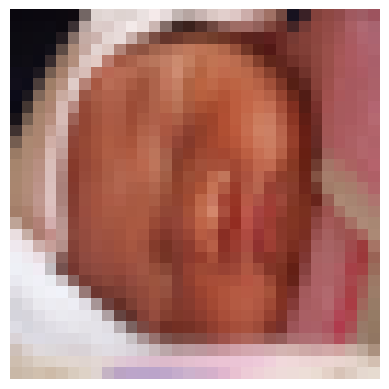

Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\baby\infant_s_000047.png


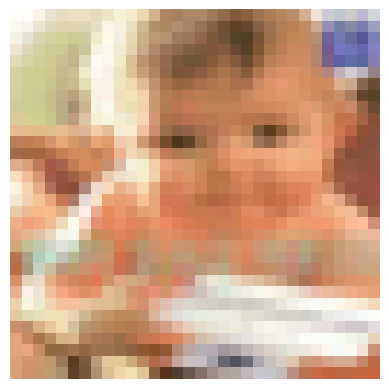


Class: bus
Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\bus\bus_s_000520.png


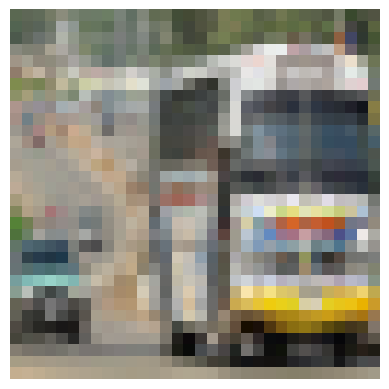

Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\bus\school_bus_s_000538.png


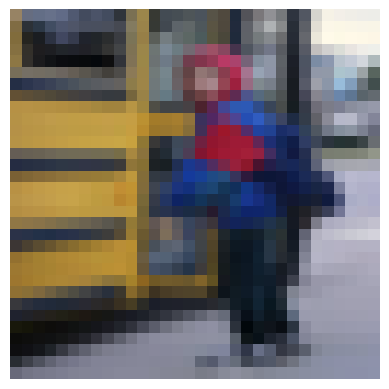


Class: butterfly
Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\butterfly\mourning_cloak_s_000073.png


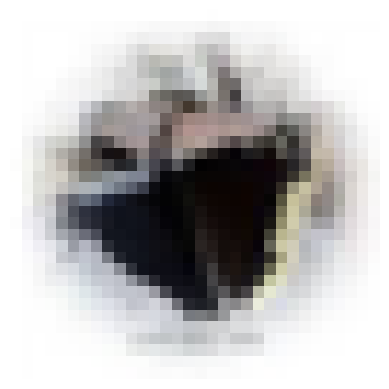

Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\butterfly\butterfly_s_000292.png


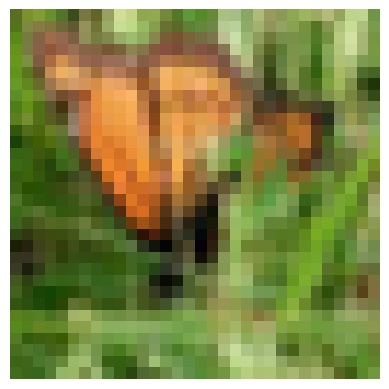


Class: dinosaur
Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\dinosaur\ankylosaur_s_000446.png


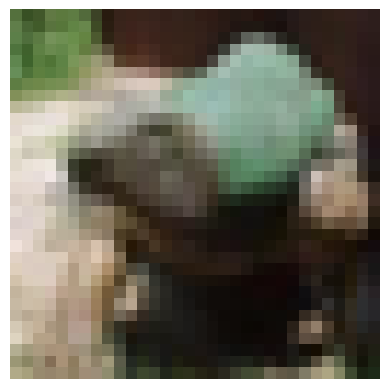

Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\dinosaur\stegosaurus_s_001997.png


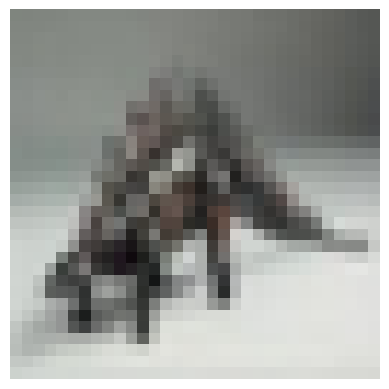


Class: dolphin
Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\dolphin\dolphin_s_000504.png


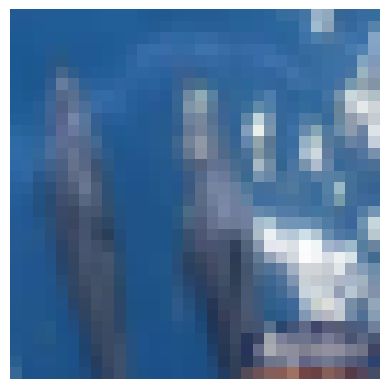

Random image: E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\dolphin\dolphin_s_000617.png


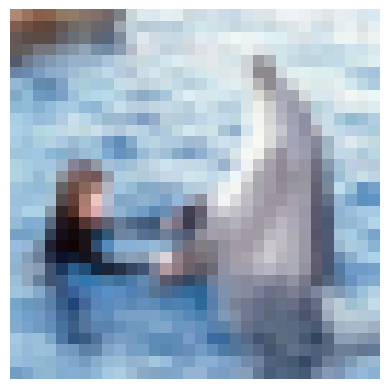

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the folder containing subfolders for each class
folder_path = r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10"

# Function to display an image
def display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Iterate over subfolders
for class_folder in os.listdir(folder_path):
    class_folder_path = os.path.join(folder_path, class_folder)
    if os.path.isdir(class_folder_path):
        # List all images in the class folder
        images = os.listdir(class_folder_path)

        # Print class name
        print("Class:", class_folder)

        # Select two random images from the class folder
        for i in range(2):
            random_image = random.choice(images)
            image_path = os.path.join(class_folder_path, random_image)
            print("Random image:", image_path)
            # Display the image
            display_image(image_path)

        print()

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [9]:
# Define dataset
dataset = ImageFolder(root=r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10", transform=transform)

# Split dataset into train and test (80-20 split)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [10]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Get class names
class_names = dataset.classes

# Print class names
print("Class names:", class_names)


Class names: ['apple', 'baby', 'bus', 'butterfly', 'dinosaur', 'dolphin']


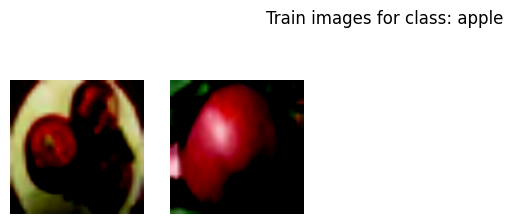

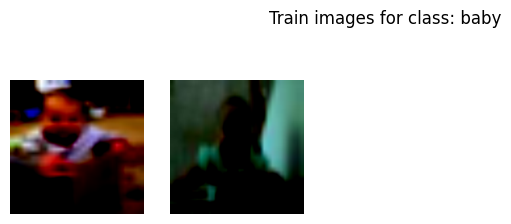

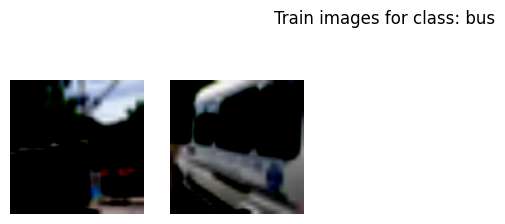

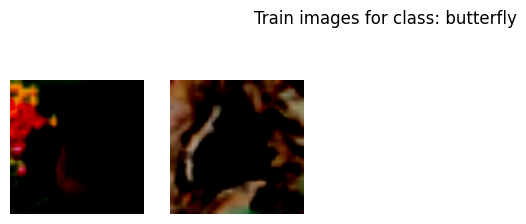

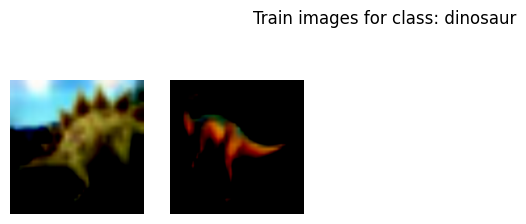

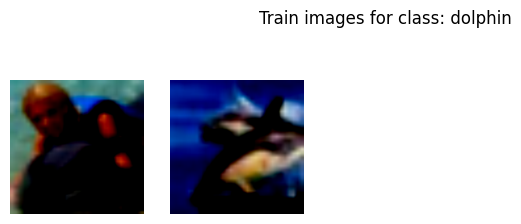

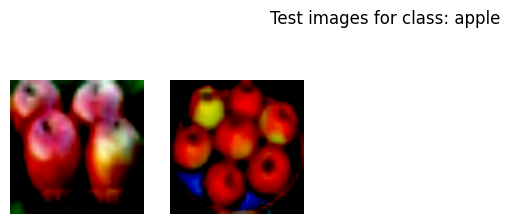

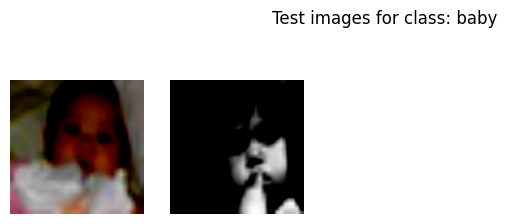

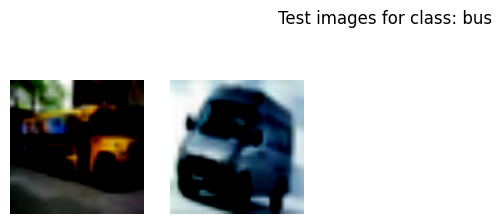

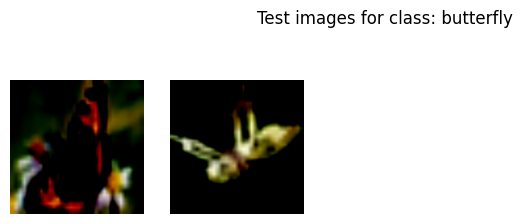

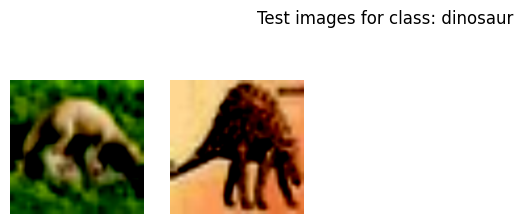

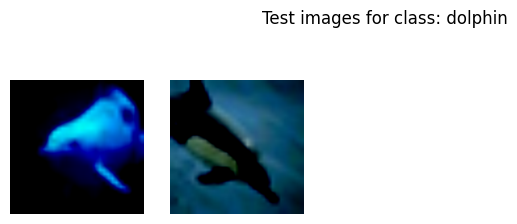

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display a grid of images
def show_images(images, title):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title)
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))
        plt.axis('off')
    plt.show()

# Function to get a few images from each class
def get_class_images(dataset, class_names):
    class_images = {class_name: [] for class_name in class_names}
    for image, label in dataset:
        class_name = class_names[label]
        if len(class_images[class_name]) < 2:  # Display 2 images per class
            class_images[class_name].append(image)
    return class_images

# Get a few images from each class in the train dataset
train_class_images = get_class_images(train_dataset, class_names)
# Display images from train dataset
for class_name, images in train_class_images.items():
    show_images(images, f"Train images for class: {class_name}")

# Get a few images from each class in the test dataset
test_class_images = get_class_images(test_dataset, class_names)
# Display images from test dataset
for class_name, images in test_class_images.items():
    show_images(images, f"Test images for class: {class_name}")


Train set - Class: apple


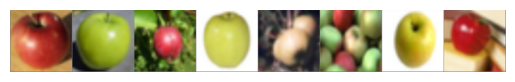

Train set - Class: baby


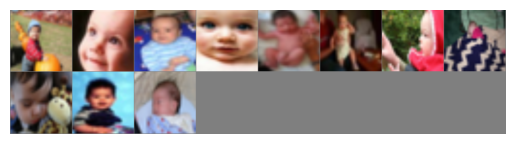

Train set - Class: bus


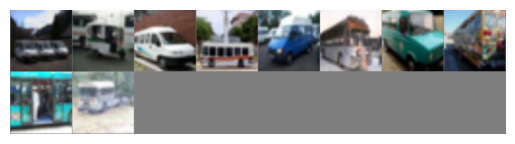

Train set - Class: butterfly


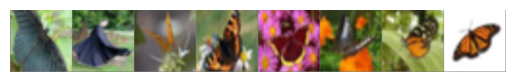

Train set - Class: dinosaur


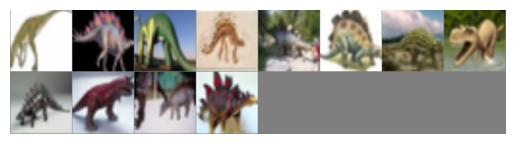

Train set - Class: dolphin


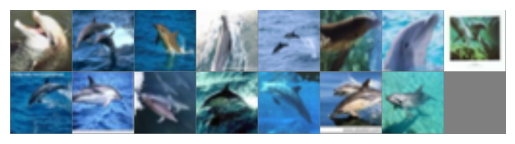

Test set - Class: apple


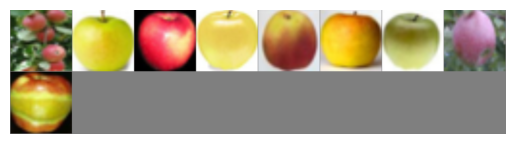

Test set - Class: baby


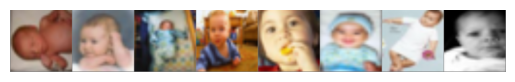

Test set - Class: bus


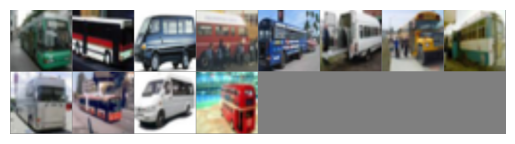

Test set - Class: butterfly


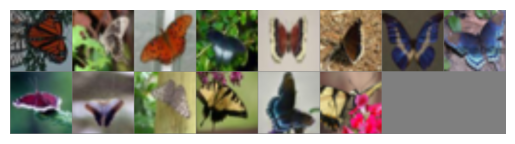

Test set - Class: dinosaur


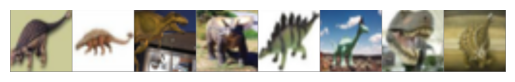

Test set - Class: dolphin


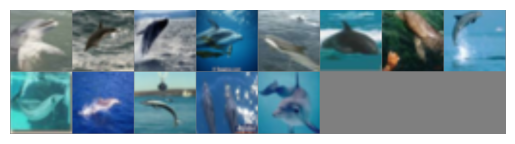

In [13]:
# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Visualize images from train set
for images, labels in train_loader:
    # Display images from each class
    for i in range(len(class_names)):
        class_index = (labels == i).nonzero().squeeze()
        class_images = images[class_index]

        print(f"Train set - Class: {class_names[i]}")
        imshow(torchvision.utils.make_grid(class_images, nrow=8))
    break  # break after one iteration to visualize only the first batch

# Visualize images from test set
for images, labels in test_loader:
    # Display images from each class
    for i in range(len(class_names)):
        class_index = (labels == i).nonzero().squeeze()
        class_images = images[class_index]

        print(f"Test set - Class: {class_names[i]}")
        imshow(torchvision.utils.make_grid(class_images, nrow=8))
    break  # break after one iteration to visualize only the first batch

In [14]:
for image_batch, labels_batch in train_loader:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

torch.Size([64, 3, 256, 256])
torch.Size([64])


The image_batch is a torch tensor of the shape (64, 3, 256, 256). This is a batch of 64 images of shape 256x256x3. The label_batch is a tensor of the shape (64,), these are corresponding labels to the 64 images.

In [36]:
print(len(train_loader.dataset))
print(train_loader.dataset[0][0].shape)
print(train_loader.dataset[1][0].shape)

2880
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


In [16]:
print(images.shape)
print(labels.shape)

torch.Size([64, 3, 256, 256])
torch.Size([64])


Step 4. Create a Convolutional Neural Network model to learn about your training set 

In [17]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, num_classes, img_height, img_width):
        super(CNNModel, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define input dimensions
img_height, img_width = 256, 256
# Define the number of classes
num_classes = 6

# Instantiate the model
model1 = CNNModel(num_classes, img_height, img_width)



In [18]:
print(model1)

CNNModel(
  (rescaling): Sequential(
    (0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=6, bias=True)
)


In [19]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model1.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 5  # Choose the number of epochs
train_model(model1, train_loader, criterion, optimizer, num_epochs)

Epoch 1/5, Loss: 1.2780, Accuracy: 0.4986
Epoch 2/5, Loss: 0.9450, Accuracy: 0.6431
Epoch 3/5, Loss: 0.8327, Accuracy: 0.6865
Epoch 4/5, Loss: 0.7055, Accuracy: 0.7358
Epoch 5/5, Loss: 0.6411, Accuracy: 0.7708


Step 5. Make predictions on the test data and compare them to the expected categories

In [20]:
# Define the testing loop
def test_model(model, test_dl):
    model.eval()  # Set the model to evalation mode
    test_acc = 0.0

    with torch.no_grad():  # Disable gradient tracking during inference
        for images, labels in test_dl:
            outputs = model(images)

            # Compute test accuracy
            acc = accuracy(outputs, labels)
            test_acc += acc.item() * images.size(0)


    # Print test statistics
    test_acc = test_acc / len(test_dl.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")

# Assuming you have defined your test dataloader as test_dataloader
test_model(model1, test_loader)


Test Accuracy: 0.7208


Experiment 1: where we train loop with Data Augmentation layers to avoid overfitting

In [22]:
import torch.optim as optim
import torch.nn.functional as F

model2 = CNNModel(num_classes, img_height, img_width)

# Define the optimizer
optimizer = optim.Adam(model2.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model2.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            data_augmented_inputs = torch.stack([transforms.RandomHorizontalFlip()(img) for img in images])
            data_augmented_inputs = torch.stack([transforms.RandomRotation(degrees=10)(img) for img in data_augmented_inputs])
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 5  # Choose the number of epochs
train_model(model2, train_loader, criterion, optimizer, num_epochs)

Epoch 1/5, Loss: 1.2874, Accuracy: 0.5069
Epoch 2/5, Loss: 0.9119, Accuracy: 0.6604
Epoch 3/5, Loss: 0.7343, Accuracy: 0.7312
Epoch 4/5, Loss: 0.6069, Accuracy: 0.7799
Epoch 5/5, Loss: 0.5098, Accuracy: 0.8118


In [23]:
# Define the testing loop
def test_model(model, test_dl):
    model.eval()  # Set the model to evalation mode
    test_acc = 0.0

    with torch.no_grad():  # Disable gradient tracking during inference
        for images, labels in test_dl:
            outputs = model(images)

            # Compute test accuracy
            acc = accuracy(outputs, labels)
            test_acc += acc.item() * images.size(0)


    # Print test statistics
    test_acc = test_acc / len(test_dl.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")

# Assuming you have defined your test dataloader as test_dataloader
test_model(model2, test_loader)


Test Accuracy: 0.7208


In [34]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
from torch import argmax

img_height, img_width = 256, 256


img = Image.open((r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\baby\infant_s_001335.png")).convert('RGB')
img = img.resize((img_width, img_height))  # Resize the image to match the model's input size
img_tensor = transforms.ToTensor()(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)


In [37]:
# Make predictions
model2.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model2(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Convert tensor to numpy array
predicted_class = class_names[argmax(probabilities)]

# Print the predicted class and confidence
predicted_class = class_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")


This image most likely belongs to baby with a 56.63% confidence.


Preprocess the image and check

In [38]:
# Load and preprocess the unseen image
image_path = r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\dinosaur\stegosaurus_s_000065.png"  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [39]:
# Perform inference
with torch.no_grad():
    output = model2(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to dinosaur with a 56.63% confidence.


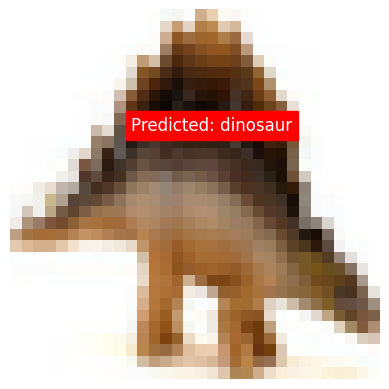

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

In [44]:
# Define input dimensions
img_height, img_width = 256, 256
# Define the number of classes
num_classes = 6

# Calculate the dimensions after passing through the convolutional layers and pooling layers
conv1_output_height = (img_height // 2)  # After the first max pooling layer
conv1_output_width = (img_width // 2)    # After the first max pooling layer
conv2_output_height = (conv1_output_height // 2)  # After the second max pooling layer
conv2_output_width = (conv1_output_width // 2)    # After the second max pooling layer
conv3_output_height = (conv2_output_height // 2)  # After the third max pooling layer
conv3_output_width = (conv2_output_width // 2)    # After the third max pooling layer

# Calculate the input size for the first fully connected layer
fc1_input_size = 64 * conv3_output_height * conv3_output_width

print("Dimensions after convolutional and pooling layers:")
print(f"Conv1 output size: ({conv1_output_height}, {conv1_output_width})")
print(f"Conv2 output size: ({conv2_output_height}, {conv2_output_width})")
print(f"Conv3 output size: ({conv3_output_height}, {conv3_output_width})")
print(f"Input size for the first fully connected layer (fc1): {fc1_input_size}")


Dimensions after convolutional and pooling layers:
Conv1 output size: (128, 128)
Conv2 output size: (64, 64)
Conv3 output size: (32, 32)
Input size for the first fully connected layer (fc1): 65536


Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import googlenet
from torch.utils.data import DataLoader

# Define the model
class GoogleNetWithLinearTop(nn.Module):
    def __init__(self, num_classes):
        super(GoogleNetWithLinearTop, self).__init__()
        # Load the pre-trained GoogleNet model
        self.googlenet = googlenet(pretrained=True)
        # Freeze the parameters of the GoogleNet model
        for param in self.googlenet.parameters():
            param.requires_grad = False
        # Add a custom linear layer on top for classification
        self.fc = nn.Linear(1000, num_classes)  # Adjust the output size for your task

    def forward(self, x):
        # Forward pass through GoogleNet
        features = self.googlenet(x)
        # Forward pass through the linear layer
        output = self.fc(features)
        return output

# Instantiate the model
num_classes = 6  # Define the number of classes for your task
model3 = GoogleNetWithLinearTop(num_classes)

# Define the optimizer
optimizer = optim.Adam(model3.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()



c:\Users\anbuv\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\anbuv\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\anbuv/.cache\torch\hub\checkpoints\googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 53.2MB/s]


Step 7: Train the GoogleNet model and compare the accuracy with the first model.

In [46]:
# Define the training loop (assuming train_dataloader is defined)
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            _, preds = torch.max(outputs, dim=1)
            acc = torch.sum(preds == labels).item() / len(preds)
            train_acc += acc * len(images)

            # Track training loss
            train_loss += loss.item() * len(images)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 3  # Choose the number of epochs
train_model(model3, train_loader, criterion, optimizer, num_epochs)


Epoch 1/3, Loss: 0.5946, Accuracy: 0.8031
Epoch 2/3, Loss: 0.2771, Accuracy: 0.9083
Epoch 3/3, Loss: 0.2350, Accuracy: 0.9247


In [75]:
# Define the test loop
def test_model(model, test_dl, criterion):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    test_acc = 0.0

    with torch.no_grad():  # Disable gradient tracking during validation
        for images, labels in test_dl:
            outputs = model3(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss

            # Compute validation accuracy
            _, preds = torch.max(outputs, dim=1)
            acc = torch.sum(preds == labels).item() / len(preds)
            test_acc += acc * len(images)

            # Track validation loss
            test_loss += loss.item() * len(images)

    # Print validation statistics
    test_loss = test_loss / len(test_dl.dataset)
    test_acc = test_acc / len(test_dl.dataset)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Assuming you have defined your validation dataloader as validation_dataloader
test_model(model3, test_loader, criterion)


Test Loss: 0.2040, Test Accuracy: 0.9194


In [50]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
from torch import argmax

img_height, img_width = 256, 256


img = Image.open((r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\butterfly\butterfly_s_000245.png")).convert('RGB')
img = img.resize((img_width, img_height))  # Resize the image to match the model's input size
img_tensor = transforms.ToTensor()(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)


In [52]:
# Make predictions
model3.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model3(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Convert tensor to numpy array
predicted_class = class_names[argmax(probabilities)]

# Print the predicted class and confidence
predicted_class = class_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")


This image most likely belongs to butterfly with a 68.58% confidence.


In [66]:
# Load and preprocess the unseen image
image_path = r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\butterfly\butterfly_s_000257.png"
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [67]:
# Perform inference
with torch.no_grad():
    output = model3(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to butterfly with a 68.58% confidence.


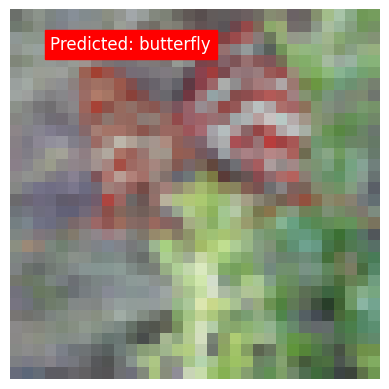

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(3, 3, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

This image most likely belongs to dinosaur with a 68.58% confidence.


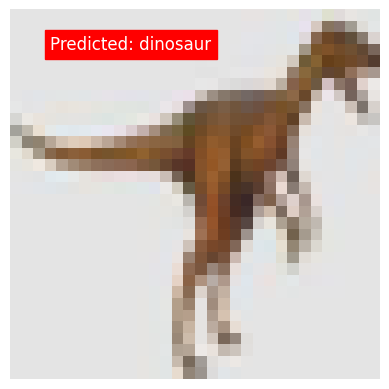

In [74]:
# Load and preprocess the unseen image
image_path = r"E:\MS DA\Semester - 3\Data 255 - 22 - Shim\Assignments\Assignment_3\CIFAR10\dinosaur\staurikosaurus_s_000151.png"
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    output = model3(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(3, 3, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

 GitHub link:
https://github.com/AV-D/Deep-learning-Experiments/tree/main

Observation:
1. Our model 1 where we built a simple CNN had a test accuracy of 0.7208
2. Our model 2 where we incorporated augmentation in the training phase had an accuracy of 0.7200, but we believe that if we run more epochs with GPU support this model will have better improvement.
3. The google net model with an added linear layer had a test accuracy of 0.91, proving to be the best performing model.